# Red Wine

## Setup

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.cross_validation import train_test_split

In [2]:
# Settings
sns.set_style('whitegrid')
# Make static images plots embedded in the notebook
%matplotlib inline

In [3]:
# Get the Data and create the data frame
filename = 'wineQualityReds.csv'
#red = pd.read_csv(filename)
red = pd.read_csv(filename,index_col=0)

In [4]:
X = red.iloc[:,:11]
y = red.iloc[:,11]

In [5]:
# split training and testing dataset
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7,
                                                    random_state=0)

## Data Summary

   1 - fixed acidity (tartaric acid - g / dm^3)
   
   2 - volatile acidity (acetic acid - g / dm^3)
   
   3 - citric acid (g / dm^3)
   
   4 - residual sugar (g / dm^3)
   
   5 - chlorides (sodium chloride - g / dm^3
   
   6 - free sulfur dioxide (mg / dm^3)
   
   7 - total sulfur dioxide (mg / dm^3)
   
   8 - density (g / cm^3)
   
   9 - pH
   
   10 - sulphates (potassium sulphate - g / dm3)
   
   11 - alcohol (% by volume)

   Output variable (based on sensory data): 
   
   12 - quality (score between 0 and 10)

In [6]:
# First rows
#red.head()
X_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
461,9.2,0.43,0.52,2.30,0.083,14.0,23.0,0.99760,3.35,0.61,11.3
1047,7.6,0.78,0.00,1.70,0.076,33.0,45.0,0.99612,3.31,0.62,10.7
586,7.6,0.51,0.24,2.40,0.091,8.0,38.0,0.99800,3.47,0.66,9.6
1182,9.8,0.39,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4
1146,8.2,0.20,0.43,2.50,0.076,31.0,51.0,0.99672,3.53,0.81,10.4


In [7]:
# last rows
#red.tail()
X_train.tail()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
764,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6
836,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3
1217,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5
560,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7
685,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4


In [8]:
# Summary of data
#red.describe(include = 'all')
X_train.describe(include = 'all')

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,8.369729,0.530992,0.273152,2.607829,0.088737,16.469729,47.086639,0.996743,3.303173,0.663361,10.390849
std,1.709065,0.190827,0.195635,1.682017,0.053334,11.307541,32.838379,0.001907,0.154662,0.195970,1.027455
min,4.900000,0.120000,0.000000,1.200000,0.012000,2.000000,7.000000,0.990640,2.740000,0.370000,8.400000
25%,7.200000,0.390000,0.100000,1.900000,0.069000,8.000000,22.000000,0.995580,3.200000,0.540000,9.500000
50%,8.000000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.300000,0.610000,10.100000
75%,9.200000,0.642500,0.420000,2.600000,0.089500,23.000000,64.500000,0.997845,3.390000,0.730000,11.000000
max,15.500000,1.330000,1.000000,15.500000,0.610000,68.000000,152.000000,1.003690,4.010000,2.000000,14.000000


In [9]:
# the index values
#red.index
X_train.index

Int64Index([ 461, 1047,  586, 1182, 1146,  498,  703,  376,  976, 1247,
            ...
            1095,  600,  278, 1034, 1384,  764,  836, 1217,  560,  685],
           dtype='int64', length=479)

## Data type, size

In [10]:
# Data frame summary: no missing values
#red.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 461 to 685
Data columns (total 11 columns):
fixed.acidity           479 non-null float64
volatile.acidity        479 non-null float64
citric.acid             479 non-null float64
residual.sugar          479 non-null float64
chlorides               479 non-null float64
free.sulfur.dioxide     479 non-null float64
total.sulfur.dioxide    479 non-null float64
density                 479 non-null float64
pH                      479 non-null float64
sulphates               479 non-null float64
alcohol                 479 non-null float64
dtypes: float64(11)
memory usage: 44.9 KB


  variableType  count
0      float64     11
1        int64      1


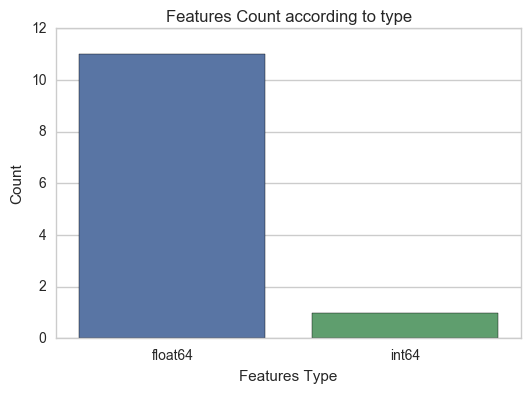

In [11]:
# Plot Feature Type graph
df = pd.DataFrame(red.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
print df
sns.barplot(data=df,x="variableType",y="count")
ax.set(xlabel='Features Type', ylabel='Count')
plt.title("Features Count according to type")
# Save figure in file
plt.savefig('TypeOfFeatures.png')
plt.show()

In [12]:
# size of the data frame
red.shape

(1599, 12)

In [13]:
# Data Quality Analysis function
# i.e. Is there any missing and duplicate value for given feature and given data frame? 
def dataqualityanalysis(df,feature):
    print "# unique values: ",len(df[feature].unique())
    print "# null values:",red[feature].isnull().sum()
    if len(df.set_index(feature).index.get_duplicates()) > 0:
        print "# duplicates: ", len(df.set_index(feature).index.get_duplicates())
        print "duplicates are:\n"
        print df.set_index(feature).index.get_duplicates()

In [14]:
# Data Quality Analysis for fixed.acidity feature
dataqualityanalysis(red,'fixed.acidity')

# unique values:  96
# null values: 0
# duplicates:  85
duplicates are:

[5.0, 5.0999999999999996, 5.2000000000000002, 5.2999999999999998, 5.4000000000000004, 5.5999999999999996, 5.7000000000000002, 5.7999999999999998, 5.9000000000000004, 6.0, 6.0999999999999996, 6.2000000000000002, 6.2999999999999998, 6.4000000000000004, 6.5, 6.5999999999999996, 6.7000000000000002, 6.7999999999999998, 6.9000000000000004, 7.0, 7.0999999999999996, 7.2000000000000002, 7.2999999999999998, 7.4000000000000004, 7.5, 7.5999999999999996, 7.7000000000000002, 7.7999999999999998, 7.9000000000000004, 8.0, 8.0999999999999996, 8.1999999999999993, 8.3000000000000007, 8.4000000000000004, 8.5, 8.5999999999999996, 8.6999999999999993, 8.8000000000000007, 8.9000000000000004, 9.0, 9.0999999999999996, 9.1999999999999993, 9.3000000000000007, 9.4000000000000004, 9.5, 9.5999999999999996, 9.6999999999999993, 9.8000000000000007, 9.9000000000000004, 10.0, 10.1, 10.199999999999999, 10.300000000000001, 10.4, 10.5, 10.6, 10.69999999

In [15]:
# Data Quality Analysis for volatile.acidity feature
dataqualityanalysis(red,'volatile.acidity')

# unique values:  143
# null values: 0
# duplicates:  118
duplicates are:

[0.12, 0.16, 0.17999999999999999, 0.19, 0.20000000000000001, 0.20999999999999999, 0.22, 0.23000000000000001, 0.23999999999999999, 0.25, 0.26000000000000001, 0.27000000000000002, 0.28000000000000003, 0.28999999999999998, 0.29999999999999999, 0.30499999999999999, 0.31, 0.315, 0.32000000000000001, 0.33000000000000002, 0.34000000000000002, 0.34999999999999998, 0.35999999999999999, 0.36499999999999999, 0.37, 0.38, 0.39000000000000001, 0.39500000000000002, 0.40000000000000002, 0.40999999999999998, 0.41499999999999998, 0.41999999999999998, 0.42999999999999999, 0.44, 0.45000000000000001, 0.46000000000000002, 0.46999999999999997, 0.47499999999999998, 0.47999999999999998, 0.48999999999999999, 0.5, 0.51000000000000001, 0.52000000000000002, 0.53000000000000003, 0.54000000000000004, 0.54500000000000004, 0.55000000000000004, 0.56000000000000005, 0.56999999999999995, 0.57499999999999996, 0.57999999999999996, 0.5849999999999999

In [16]:
# Data Quality Analysis for citric.acid feature
dataqualityanalysis(red,'citric.acid')

# unique values:  80
# null values: 0
# duplicates:  73
duplicates are:

[0.0, 0.01, 0.02, 0.029999999999999999, 0.040000000000000001, 0.050000000000000003, 0.059999999999999998, 0.070000000000000007, 0.080000000000000002, 0.089999999999999997, 0.10000000000000001, 0.11, 0.12, 0.13, 0.14000000000000001, 0.14999999999999999, 0.16, 0.17000000000000001, 0.17999999999999999, 0.19, 0.20000000000000001, 0.20999999999999999, 0.22, 0.23000000000000001, 0.23999999999999999, 0.25, 0.26000000000000001, 0.27000000000000002, 0.28000000000000003, 0.28999999999999998, 0.29999999999999999, 0.31, 0.32000000000000001, 0.33000000000000002, 0.34000000000000002, 0.34999999999999998, 0.35999999999999999, 0.37, 0.38, 0.39000000000000001, 0.40000000000000002, 0.40999999999999998, 0.41999999999999998, 0.42999999999999999, 0.44, 0.45000000000000001, 0.46000000000000002, 0.46999999999999997, 0.47999999999999998, 0.48999999999999999, 0.5, 0.51000000000000001, 0.52000000000000002, 0.53000000000000003, 0.5400000000

In [17]:
# Data Quality Analysis for residual.sugar feature
dataqualityanalysis(red,'residual.sugar')

# unique values:  91
# null values: 0
# duplicates:  64
duplicates are:

[0.90000000000000002, 1.2, 1.3, 1.3999999999999999, 1.5, 1.6000000000000001, 1.6499999999999999, 1.7, 1.75, 1.8, 1.8999999999999999, 2.0, 2.0499999999999998, 2.1000000000000001, 2.1499999999999999, 2.2000000000000002, 2.2999999999999998, 2.3999999999999999, 2.5, 2.6000000000000001, 2.7000000000000002, 2.7999999999999998, 2.8999999999999999, 3.0, 3.1000000000000001, 3.2000000000000002, 3.2999999999999998, 3.3999999999999999, 3.5, 3.6000000000000001, 3.7000000000000002, 3.7999999999999998, 3.8999999999999999, 4.0, 4.0999999999999996, 4.2000000000000002, 4.2999999999999998, 4.4000000000000004, 4.5, 4.5999999999999996, 4.6500000000000004, 4.7999999999999998, 5.0999999999999996, 5.2000000000000002, 5.5, 5.5999999999999996, 5.7999999999999998, 5.9000000000000004, 6.0, 6.0999999999999996, 6.2000000000000002, 6.2999999999999998, 6.4000000000000004, 6.5499999999999998, 6.5999999999999996, 6.7000000000000002, 7.799999999999

In [18]:
# Data Quality Analysis for chlorides feature
dataqualityanalysis(red,'chlorides')

# unique values:  153
# null values: 0
# duplicates:  94
duplicates are:

[0.012, 0.037999999999999999, 0.039, 0.040999999999999995, 0.042000000000000003, 0.044000000000000004, 0.044999999999999998, 0.045999999999999999, 0.047, 0.048000000000000001, 0.049000000000000002, 0.050000000000000003, 0.052000000000000005, 0.052999999999999999, 0.054000000000000006, 0.055, 0.055999999999999994, 0.057000000000000002, 0.057999999999999996, 0.059000000000000004, 0.059999999999999998, 0.060999999999999999, 0.062, 0.063, 0.064000000000000001, 0.065000000000000002, 0.066000000000000003, 0.067000000000000004, 0.068000000000000005, 0.069000000000000006, 0.070000000000000007, 0.070999999999999994, 0.072000000000000008, 0.072999999999999995, 0.07400000000000001, 0.074999999999999997, 0.075999999999999998, 0.076999999999999999, 0.078, 0.079000000000000001, 0.080000000000000002, 0.081000000000000003, 0.08199999999999999, 0.083000000000000004, 0.084000000000000005, 0.085000000000000006, 0.085999999999999993

In [19]:
# Data Quality Analysis for free.sulfur.dioxide feature
dataqualityanalysis(red,'free.sulfur.dioxide')

# unique values:  60
# null values: 0
# duplicates:  50
duplicates are:

[1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 37.5, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 45.0, 48.0, 50.0, 51.0, 52.0, 55.0, 68.0]


In [20]:
# Data Quality Analysis for total.sulfur.dioxide feature
dataqualityanalysis(red,'total.sulfur.dioxide')

# unique values:  144
# null values: 0
# duplicates:  130
duplicates are:

[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 77.5, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 119.0, 120.0, 121.0, 122.0, 124.0, 125.0, 127.0, 128.0, 129.0, 131.0, 133.0, 134.0, 135.0, 136.0, 141.0, 143.0, 144.0, 145.0, 147.0, 148.0, 151.0]


In [21]:
# Data Quality Analysis for density feature
dataqualityanalysis(red,'density')

# unique values:  436
# null values: 0
# duplicates:  269
duplicates are:

[0.99007000000000012, 0.99063999999999997, 0.99160000000000004, 0.99182000000000003, 0.99219999999999997, 0.99239999999999995, 0.99242000000000008, 0.99257999999999991, 0.99280000000000002, 0.99293999999999993, 0.99316000000000004, 0.99331000000000003, 0.99339999999999995, 0.99346000000000001, 0.99352000000000007, 0.99353999999999998, 0.99356, 0.99357999999999991, 0.99360000000000004, 0.99362000000000006, 0.99370000000000003, 0.99370999999999998, 0.99373999999999996, 0.99376000000000009, 0.99377999999999989, 0.99387999999999987, 0.99392000000000003, 0.99396000000000007, 0.99400000000000011, 0.99402000000000013, 0.99407999999999996, 0.99413999999999991, 0.99417999999999995, 0.99419000000000002, 0.99419999999999997, 0.99429999999999996, 0.99437999999999993, 0.99439999999999995, 0.99443999999999999, 0.99447999999999992, 0.99457999999999991, 0.99460000000000004, 0.99462000000000006, 0.99463999999999997, 0.9946700000

In [22]:
# Data Quality Analysis for pH feature
dataqualityanalysis(red,'pH')

# unique values:  89
# null values: 0
# duplicates:  80
duplicates are:

[2.8799999999999999, 2.8900000000000001, 2.9199999999999999, 2.9300000000000002, 2.9399999999999999, 2.98, 2.9900000000000002, 3.0, 3.0099999999999998, 3.02, 3.0299999999999998, 3.04, 3.0499999999999998, 3.0600000000000001, 3.0699999999999998, 3.0800000000000001, 3.0899999999999999, 3.1000000000000001, 3.1099999999999999, 3.1200000000000001, 3.1299999999999999, 3.1400000000000001, 3.1499999999999999, 3.1600000000000001, 3.1699999999999999, 3.1800000000000002, 3.1899999999999999, 3.2000000000000002, 3.21, 3.2200000000000002, 3.23, 3.2400000000000002, 3.25, 3.2599999999999998, 3.27, 3.2799999999999998, 3.29, 3.2999999999999998, 3.3100000000000001, 3.3199999999999998, 3.3300000000000001, 3.3399999999999999, 3.3500000000000001, 3.3599999999999999, 3.3700000000000001, 3.3799999999999999, 3.3900000000000001, 3.3999999999999999, 3.4100000000000001, 3.4199999999999999, 3.4300000000000002, 3.4399999999999999, 3.45000000000

In [23]:
# Data Quality Analysis for sulphates feature
dataqualityanalysis(red,'sulphates')

# unique values:  96
# null values: 0
# duplicates:  76
duplicates are:

[0.37, 0.39000000000000001, 0.40000000000000002, 0.41999999999999998, 0.42999999999999999, 0.44, 0.45000000000000001, 0.46000000000000002, 0.46999999999999997, 0.47999999999999998, 0.48999999999999999, 0.5, 0.51000000000000001, 0.52000000000000002, 0.53000000000000003, 0.54000000000000004, 0.55000000000000004, 0.56000000000000005, 0.56999999999999995, 0.57999999999999996, 0.58999999999999997, 0.59999999999999998, 0.60999999999999999, 0.62, 0.63, 0.64000000000000001, 0.65000000000000002, 0.66000000000000003, 0.67000000000000004, 0.68000000000000005, 0.68999999999999995, 0.69999999999999996, 0.70999999999999996, 0.71999999999999997, 0.72999999999999998, 0.73999999999999999, 0.75, 0.76000000000000001, 0.77000000000000002, 0.78000000000000003, 0.79000000000000004, 0.80000000000000004, 0.81000000000000005, 0.81999999999999995, 0.82999999999999996, 0.83999999999999997, 0.84999999999999998, 0.85999999999999999, 0.87, 0.8

In [24]:
# Data Quality Analysis for alcohol feature
dataqualityanalysis(red,'alcohol')

# unique values:  65
# null values: 0
# duplicates:  52
duplicates are:

[8.4000000000000004, 8.6999999999999993, 8.8000000000000007, 9.0, 9.0999999999999996, 9.1999999999999993, 9.3000000000000007, 9.4000000000000004, 9.5, 9.5500000000000007, 9.5999999999999996, 9.6999999999999993, 9.8000000000000007, 9.9000000000000004, 10.0, 10.033333333333299, 10.1, 10.199999999999999, 10.300000000000001, 10.4, 10.5, 10.550000000000001, 10.6, 10.699999999999999, 10.800000000000001, 10.9, 11.0, 11.1, 11.199999999999999, 11.300000000000001, 11.4, 11.5, 11.6, 11.699999999999999, 11.800000000000001, 11.9, 12.0, 12.1, 12.199999999999999, 12.300000000000001, 12.4, 12.5, 12.6, 12.699999999999999, 12.800000000000001, 12.9, 13.0, 13.1, 13.300000000000001, 13.4, 13.6, 14.0]


In [25]:
# Data Quality Analysis for quality feature
dataqualityanalysis(red,'quality')

# unique values:  6
# null values: 0
# duplicates:  6
duplicates are:

[3, 4, 5, 6, 7, 8]


quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


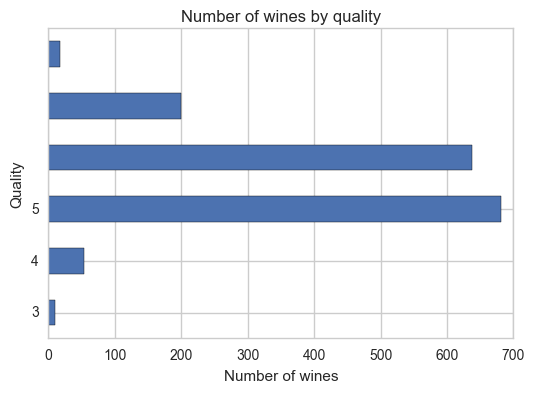

In [26]:
# Analysis with Group by quality
# where most quality are?
# conclusion:  
q = ['3','4','5','6','7','8']
print red.groupby([red.quality]).size()
red.groupby([red.quality]).size().plot(kind='barh')
plt.ylabel('Quality')
plt.yticks(np.arange(3), q)
plt.xlabel('Number of wines')
plt.title('Number of wines by quality')
plt.savefig('NbWineByQuality.png')
plt.show()

## Features distribution

In [27]:
red.median()

fixed.acidity            7.90000
volatile.acidity         0.52000
citric.acid              0.26000
residual.sugar           2.20000
chlorides                0.07900
free.sulfur.dioxide     14.00000
total.sulfur.dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [28]:
red.skew()

fixed.acidity           0.982751
volatile.acidity        0.671593
citric.acid             0.318337
residual.sugar          4.540655
chlorides               5.680347
free.sulfur.dioxide     1.250567
total.sulfur.dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [29]:
# What are the most frequent values for each feature
red.mode()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


In [30]:
# Summarize the data
def describe_data(data):
    print 'Mean:', data.mean()
    print 'Mode:',data.mode()
    print 'Median:', data.median()
    print 'Standard deviation:', data.std()
    print 'Minimum:', data.min()
    print 'Maximum:', data.max() 

Mean: 8.3196372733
Mode: 0    7.2
dtype: float64
Median: 7.9
Standard deviation: 1.74109631813
Minimum: 4.6
Maximum: 15.9


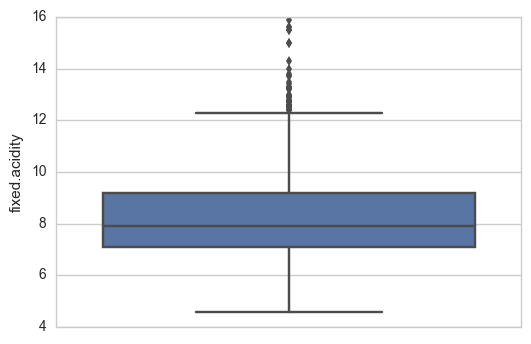

In [31]:
# Summarize the data for fixed.acidity Feature
describe_data(red['fixed.acidity'])

sns.boxplot(y="fixed.acidity", data=red)
plt.savefig('boxplotFixedAcidity.png')

Mean: 0.527820512821
Mode: 0    0.6
dtype: float64
Median: 0.52
Standard deviation: 0.179059704154
Minimum: 0.12
Maximum: 1.58


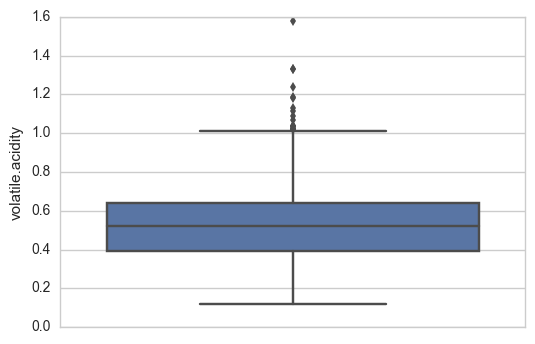

In [32]:
# Summarize the data for volatile.acidity Feature
describe_data(red['volatile.acidity'])

sns.boxplot(y="volatile.acidity", data=red)
plt.savefig('boxplotVolatileAcidity.png')

Mean: 0.270975609756
Mode: 0    0.0
dtype: float64
Median: 0.26
Standard deviation: 0.194801137405
Minimum: 0.0
Maximum: 1.0


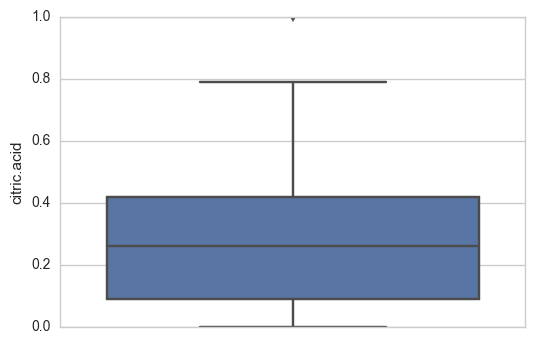

In [33]:
# Summarize the data for citric.acid Feature
describe_data(red['citric.acid'])

sns.boxplot(y="citric.acid", data=red)
plt.savefig('boxplotCitricAcid.png')

Mean: 2.53880550344
Mode: 0    2.0
dtype: float64
Median: 2.2
Standard deviation: 1.40992805951
Minimum: 0.9
Maximum: 15.5


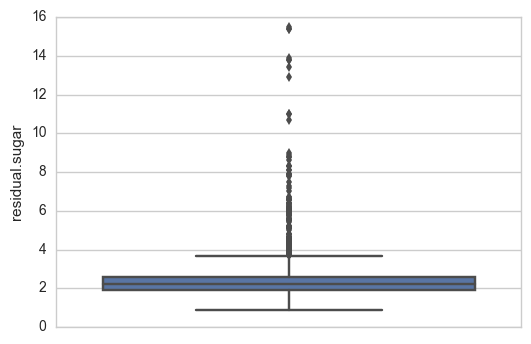

In [34]:
# Summarize the data for residual.sugar Feature
describe_data(red['residual.sugar'])

sns.boxplot(y="residual.sugar", data=red)
plt.savefig('boxplotResidualSugar.png')

Mean: 0.0874665415885
Mode: 0    0.08
dtype: float64
Median: 0.079
Standard deviation: 0.0470653020101
Minimum: 0.012
Maximum: 0.611


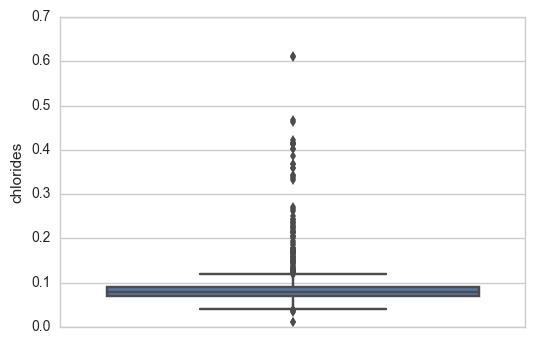

In [35]:
# Summarize the data for chlorides Feature
describe_data(red['chlorides'])

sns.boxplot(y="chlorides", data=red)
plt.savefig('boxplotChlorides.png')

Mean: 15.8749218261
Mode: 0    6.0
dtype: float64
Median: 14.0
Standard deviation: 10.4601569698
Minimum: 1.0
Maximum: 72.0


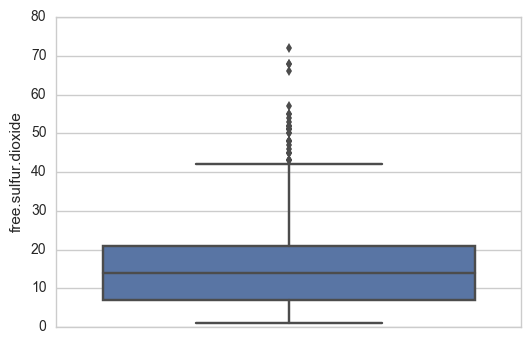

In [36]:
# Summarize the data for free.sulfur.dioxide Feature
describe_data(red['free.sulfur.dioxide'])

sns.boxplot(y="free.sulfur.dioxide", data=red)
plt.savefig('boxplotfreeSulfurDioxide.png')

Mean: 46.4677923702
Mode: 0    28.0
dtype: float64
Median: 38.0
Standard deviation: 32.8953244783
Minimum: 6.0
Maximum: 289.0


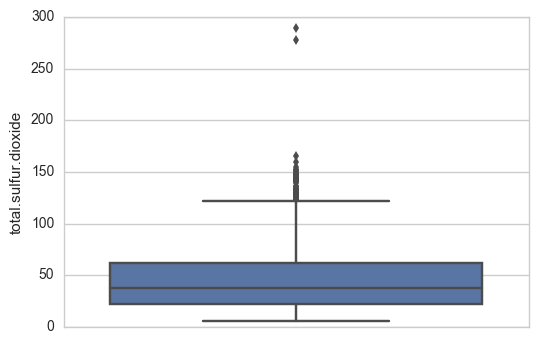

In [37]:
# Summarize the data for total.sulfur.dioxide Feature
describe_data(red['total.sulfur.dioxide'])

sns.boxplot(y="total.sulfur.dioxide", data=red)
plt.savefig('boxplottotalSulfurDioxide.png')

Mean: 0.996746679174
Mode: 0    0.9972
dtype: float64
Median: 0.99675
Standard deviation: 0.00188733395384
Minimum: 0.99007
Maximum: 1.00369


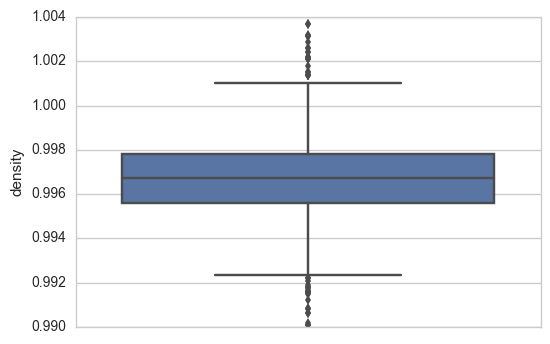

In [38]:
# Summarize the data for density Feature
describe_data(red['density'])

sns.boxplot(y="density", data=red)
plt.savefig('boxplotdensity.png')

Mean: 3.31111319575
Mode: 0    3.3
dtype: float64
Median: 3.31
Standard deviation: 0.154386464904
Minimum: 2.74
Maximum: 4.01


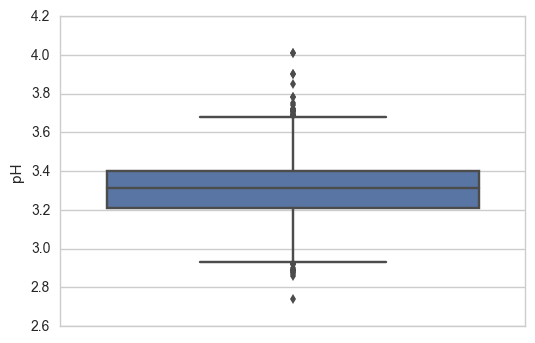

In [39]:
# Summarize the data for pH Feature
describe_data(red['pH'])

sns.boxplot(y="pH", data=red)
plt.savefig('boxplotpH.png')

Mean: 0.658148843027
Mode: 0    0.6
dtype: float64
Median: 0.62
Standard deviation: 0.16950697959
Minimum: 0.33
Maximum: 2.0


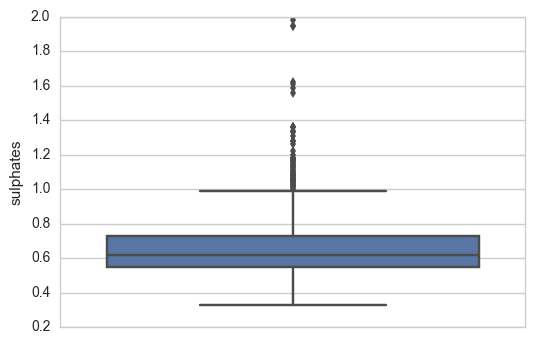

In [40]:
# Summarize the data for sulphates Feature
describe_data(red['sulphates'])

sns.boxplot(y="sulphates", data=red)
plt.savefig('boxplotsulphates.png')

Mean: 10.4229831144
Mode: 0    9.5
dtype: float64
Median: 10.2
Standard deviation: 1.06566758185
Minimum: 8.4
Maximum: 14.9


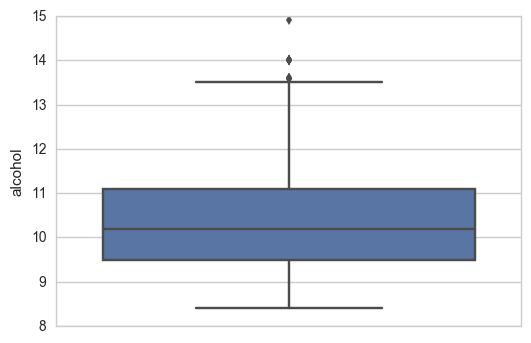

In [41]:
# Summarize the data for alcohol Feature
describe_data(red['alcohol'])

sns.boxplot(y="alcohol", data=red)
plt.savefig('boxplotalcohol.png')

Mean: 5.63602251407
Mode: 0    5
dtype: int64
Median: 6.0
Standard deviation: 0.807569439735
Minimum: 3
Maximum: 8


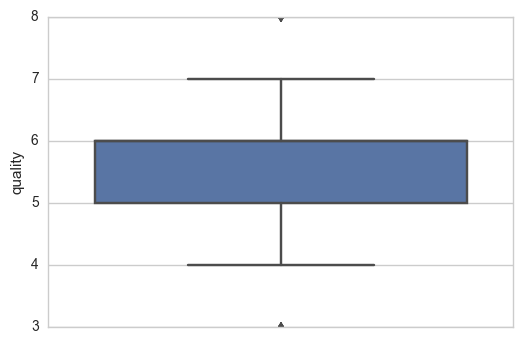

In [42]:
# Summarize the data for alcohol Feature
describe_data(red['quality'])

sns.boxplot(y="quality", data=red)
plt.savefig('boxplotquality.png')

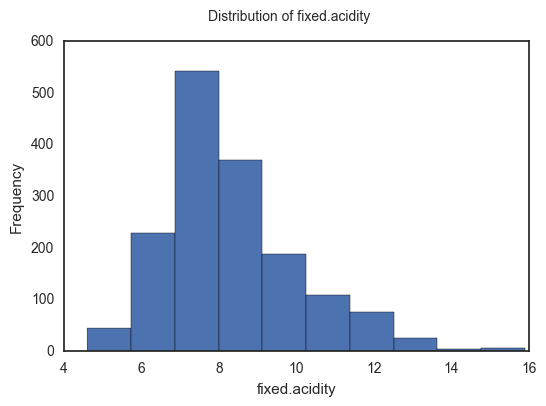

In [43]:
# Distribution of fixed.acidity
plt.style.use('seaborn-white')
red['fixed.acidity'].plot.hist()
plt.suptitle('Distribution of fixed.acidity')
plt.xlabel('fixed.acidity')
plt.ylabel('Frequency')
#plt.axis([0, 90, 0, 400])
plt.savefig('fixedAcidityDistribution.png')
plt.show()

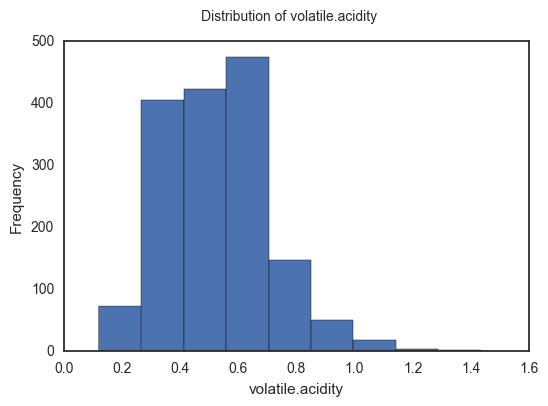

In [44]:
# Distribution of volatile.acidity
plt.style.use('seaborn-white')
red['volatile.acidity'].plot.hist()
plt.suptitle('Distribution of volatile.acidity')
plt.xlabel('volatile.acidity')
plt.ylabel('Frequency')
#plt.axis([0, 90, 0, 400])
plt.savefig('volatileAcidityDistribution.png')
plt.show()

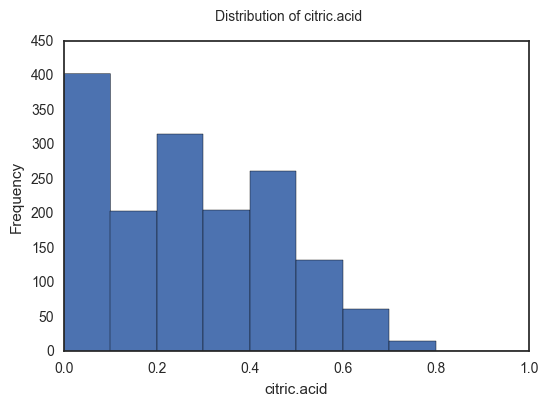

In [45]:
# Distribution of citric.acid
plt.style.use('seaborn-white')
red['citric.acid'].plot.hist()
plt.suptitle('Distribution of citric.acid')
plt.xlabel('citric.acid')
plt.ylabel('Frequency')
#plt.axis([0, 90, 0, 400])
plt.savefig('citricAcidDistribution.png')
plt.show()

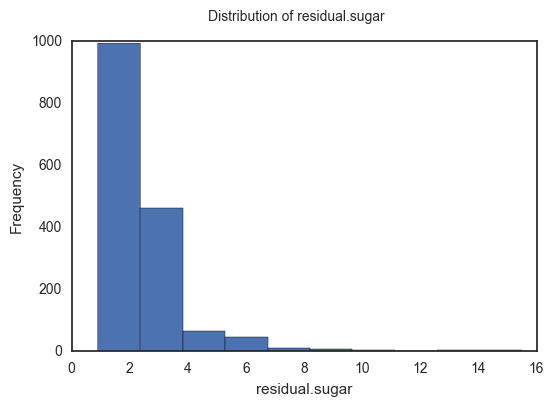

In [46]:
# Distribution of residual.sugar
plt.style.use('seaborn-white')
red['residual.sugar'].plot.hist()
plt.suptitle('Distribution of residual.sugar')
plt.xlabel('residual.sugar')
plt.ylabel('Frequency')
#plt.axis([0, 90, 0, 400])
plt.savefig('residualSugarDistribution.png')
plt.show()

## Build New feature: good

In [47]:
# Build new feature good
for ix in red.index:
    q = red.loc[ix,'quality']
    if q > 6:
        red.loc[ix,'good'] = 1
    else:
        red.loc[ix,'good'] = 0

In [48]:
red.good.describe()

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: good, dtype: float64

## Relation between features

In [49]:
red.columns.values

array(['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'good'], dtype=object)

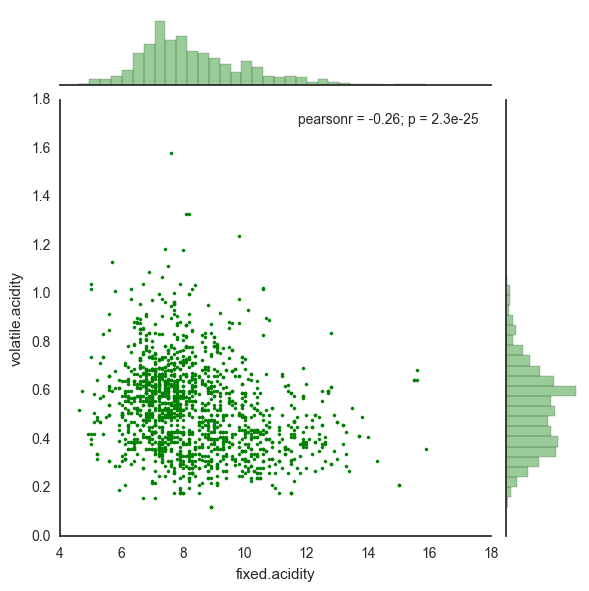

In [50]:
# looking for any relation between the two continous features, if any
sns.jointplot(x="fixed.acidity", y="volatile.acidity",color='g', data=red,marker='.')
plt.savefig('RelationFixedAcidityvsVolatileAcidity.png')

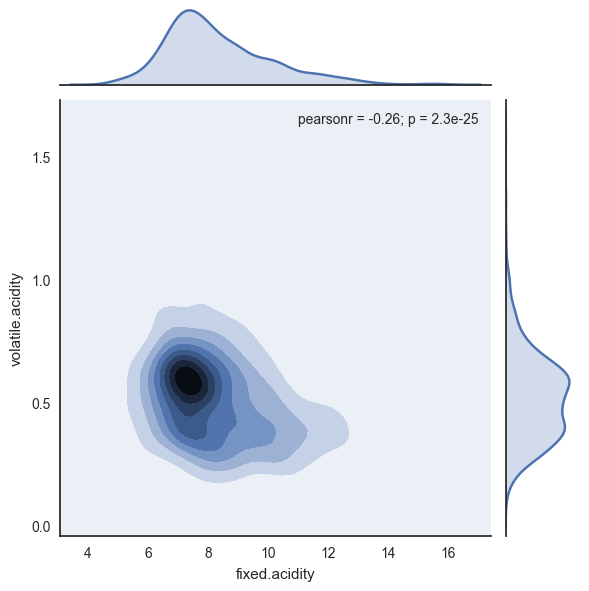

In [51]:
# looking for any relation between the two continous features, if any
sns.jointplot(x="fixed.acidity", y="volatile.acidity", data=red,marker='.',kind='kde')
plt.savefig('RelationFixedAcidityvsVolatileAcidity.png')

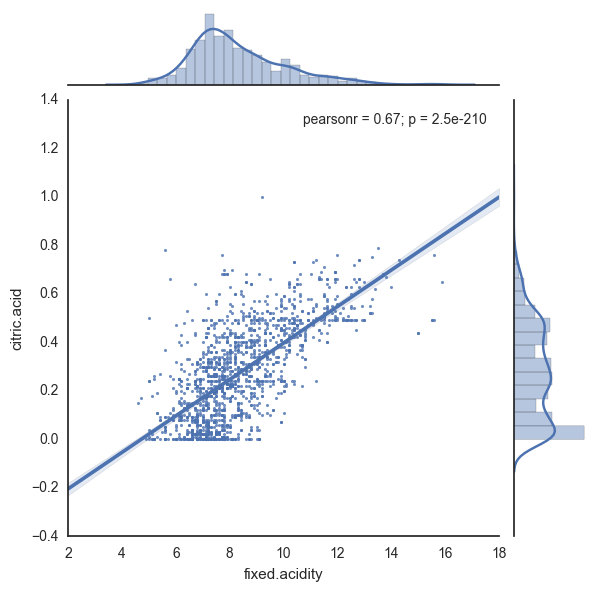

In [52]:
# looking for any relation between the two continous features, if any
sns.jointplot(x="fixed.acidity", y="citric.acid", data=red,marker='.',kind="reg")
plt.savefig('RelationFixedAcidityvsCitricAcidity.png')

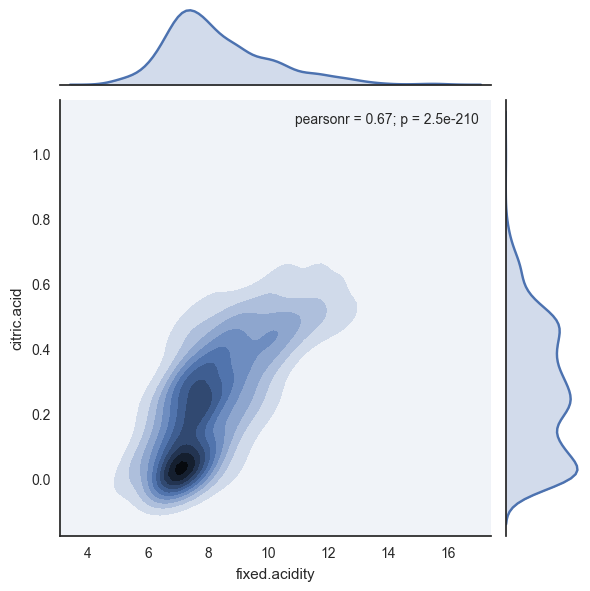

In [53]:
# looking for any relation between the two continous features, if any
sns.jointplot(x="fixed.acidity", y="citric.acid", data=red,marker='.',kind="kde")
plt.savefig('RelationFixedAcidityvsCitricAcidity.png')

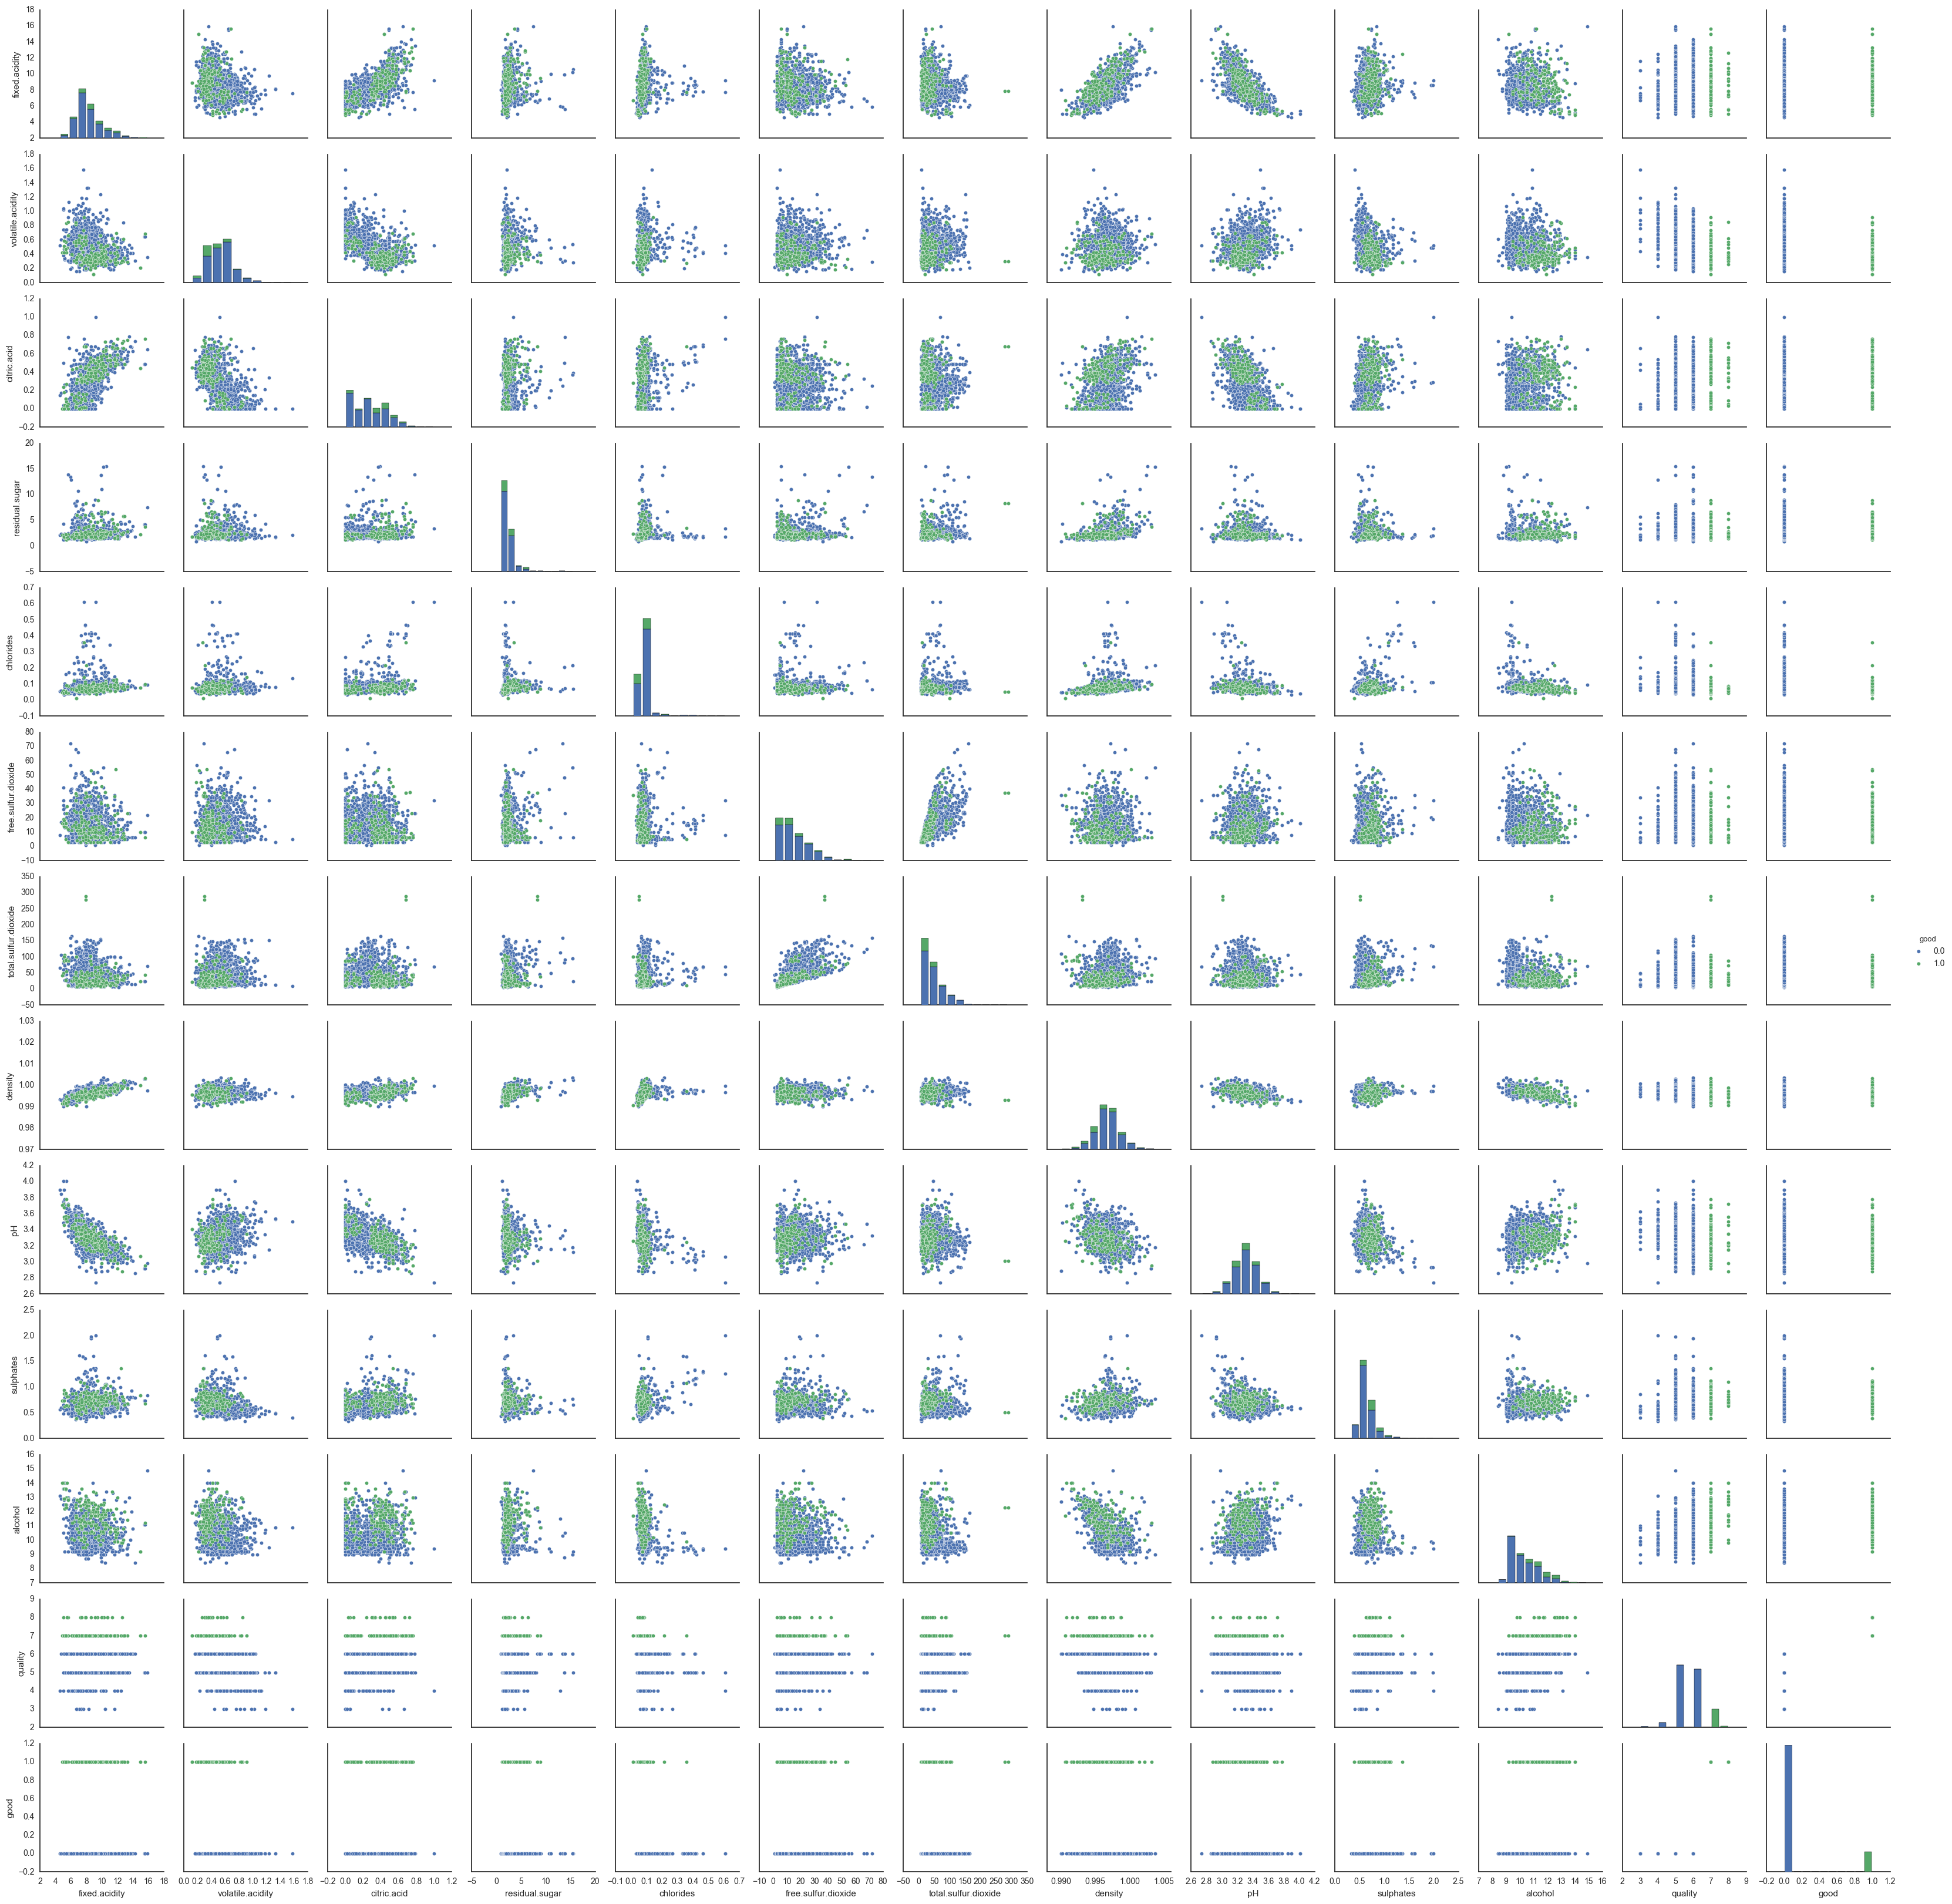

In [54]:
sns.pairplot(red.iloc[:,0:13], hue='good',size=2.5);

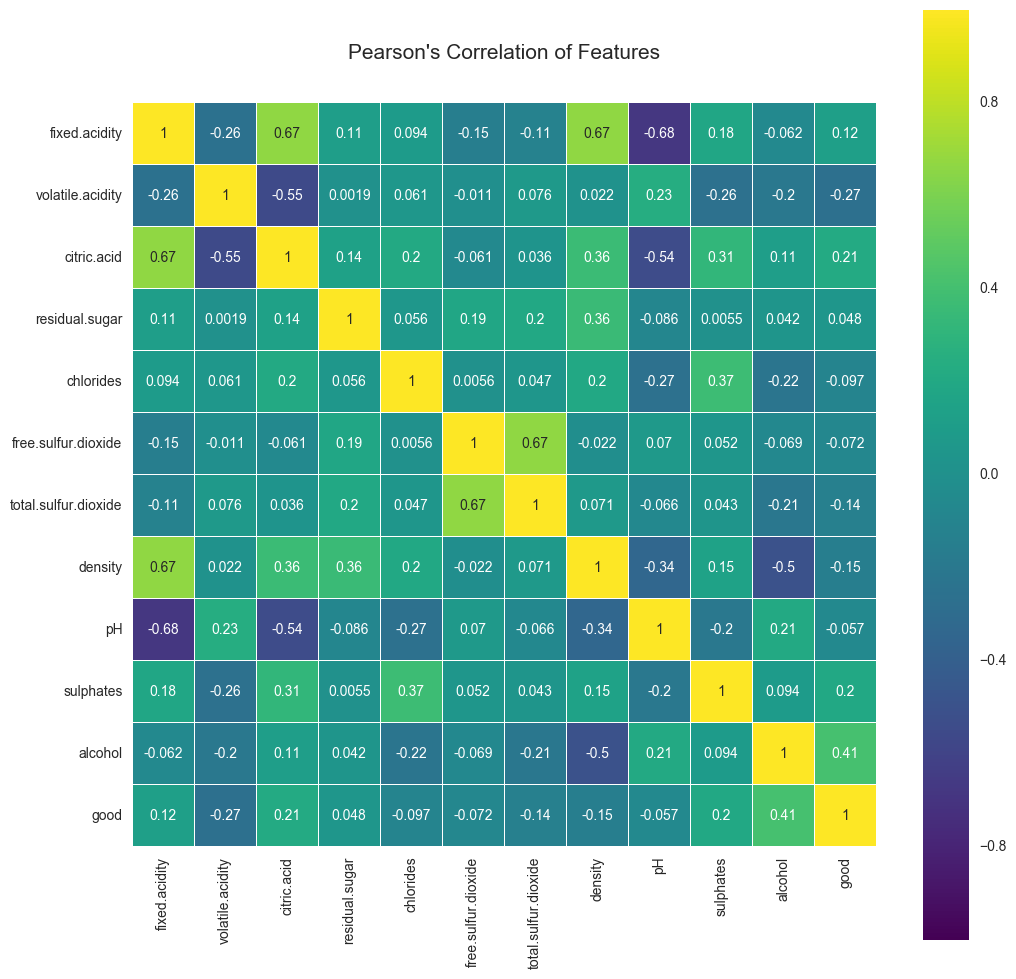

In [55]:
# Plot the Pearson's Correlation Diagram: 
# Child and Adult have a perfect decreasing linear correlation: we can skip Adult in the diagram
# Female and Male have a perfect decreasing linear correlation: we can skip Male in the diagram
#df = red.drop(['Adult','Male'], axis=1,inplace=False)
df = red.drop(['quality'], axis=1,inplace=False)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Pearson's Correlation of Features", y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('PearsonCorrelationOfFeatures.png')
plt.show()

## Predictive models

### 1. Tree

In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [57]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [58]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)

In [59]:
acc

0.56160714285714286

### 2. Logistic Regression

In [60]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [61]:
# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [62]:
Z = logreg.predict(X_test)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, Z)

In [63]:
acc

0.57678571428571423